# Targeting the Right Customers: Predicting Bank Term Deposit Signups
In the highly competitive banking industry, acquiring new customers and promoting long-term financial products such as term deposits requires precise targeting and effective marketing strategies. Traditional marketing campaigns often lead to high operational costs with low conversion rates due to indiscriminate outreach. This project aims to address this challenge by applying machine learning techniques to predict whether a customer will subscribe to a term deposit, using historical marketing data collected by a bank. 

By analyzing a variety of customer attributes—including demographic factors (age, job, marital status), financial indicators (housing loan, credit default), and previous campaign performance—this project builds a binary classification model to distinguish between likely and unlikely subscribers. The goal is to enable the bank to prioritize high-potential leads, reduce  operationatal costs , increase conversion rates and improve overall campaign efficiency. In doing so, we bridge the gap between business goals and data-driven decision making.



## Data Dictionary
| Column | Variable | Class |
| --- | --------------- | --- |
| age | age of customer | |
| job | type of job | categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown" |
| marital | marital status | categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed |
| education | highest degree of customer | categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown" |
| default | has credit in default? | categorical: "no","yes","unknown" |
| housing | has housing loan? | categorical: "no","yes","unknown" |
| loan | has personal loan? | categorical: "no","yes","unknown" |
| contact | contact communication type | categorical: "cellular","telephone" |
| month | last contact month of year | categorical: "jan", "feb", "mar", ..., "nov", "dec" | 
| day_of_week | last contact day of the week | categorical: "mon","tue","wed","thu","fri" |
| campaign | number of contacts performed during this campaign and for this client | numeric, includes last contact |
| pdays | number of days that passed by after the client was last contacted from a previous campaign | numeric; 999 means client was not previously contacted |
| previous | number of contacts performed before this campaign and for this client | numeric |
| poutcome | outcome of the previous marketing campaign | categorical: "failure","nonexistent","success" |
| emp.var.rate | employment variation rate - quarterly indicator | numeric |
| cons.price.idx | consumer price index - monthly indicator | numeric   | 
| cons.conf.idx | consumer confidence index - monthly indicator | numeric |   
| euribor3m | euribor 3 month rate - daily indicator | numeric |
| nr.employed | number of employees - quarterly indicator | numeric |
| y | has the client subscribed a term deposit? | binary: "yes","no" |

## Importing the required libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

##  Loading the dataset

In [137]:
df = pd.read_csv(r"C:\Users\USER\Downloads\bank-marketing.csv", sep=";")
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [138]:
df['y'] = df['y'].str.strip().str.lower()
#print(df['y'].unique())
df['y'] = df['y'].map({'no': 0, 'yes': 1})


In [139]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## Data Exploration

In [140]:

print("Shape:", df.shape)
df.info()

Shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

## Data Cleaning & Validation

handling missng values

In [141]:
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts[unknown_counts > 0])

job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


In [100]:
df.replace('unknown', 'Unknown', inplace=True)
df.isnull().sum()
df.apply(lambda x: (x == 'unknown').sum())
unknown_counts = df.apply(lambda x: (x == 'unknown').sum())
print(unknown_counts[unknown_counts > 0])

Series([], dtype: int64)


In [142]:
print("Shape:", df.shape)
df.info()

Shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.id

## Exploratory Data Analysis(EDA)

#### Descriptive Statistics


In [102]:
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The descriptive statistics of the Bank Marketing dataset provide key insights into its numerical features. The dataset includes 41188 entries for columns. The mean values for key features are as follows: 
                                                                                                                                                                   'Age' is 40, ' cons.price.idx' is 93, and ' cons.conf.idx' is 40. The dataset shows variability, with 'Age' ranging from 14 to 98, . The 'previous' indicates that approximately 17.3% of the customers were contacted before this campaign, as reflected in the mean value of 0.173.  These statistics highlight the diversity and range of customer behaviors captured in the dataset, which is essential for developing a robust subscription prediction model.

#### Target Variable Analysis

In [143]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

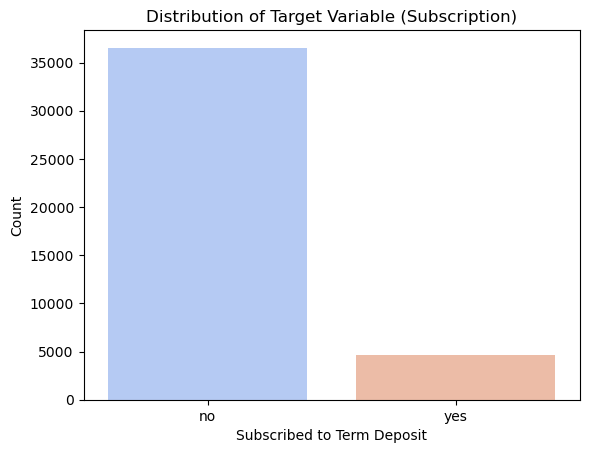

In [104]:
sns.countplot(data=df, x='y', hue='y', palette='coolwarm', legend=False)
plt.title('Distribution of Target Variable (Subscription)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

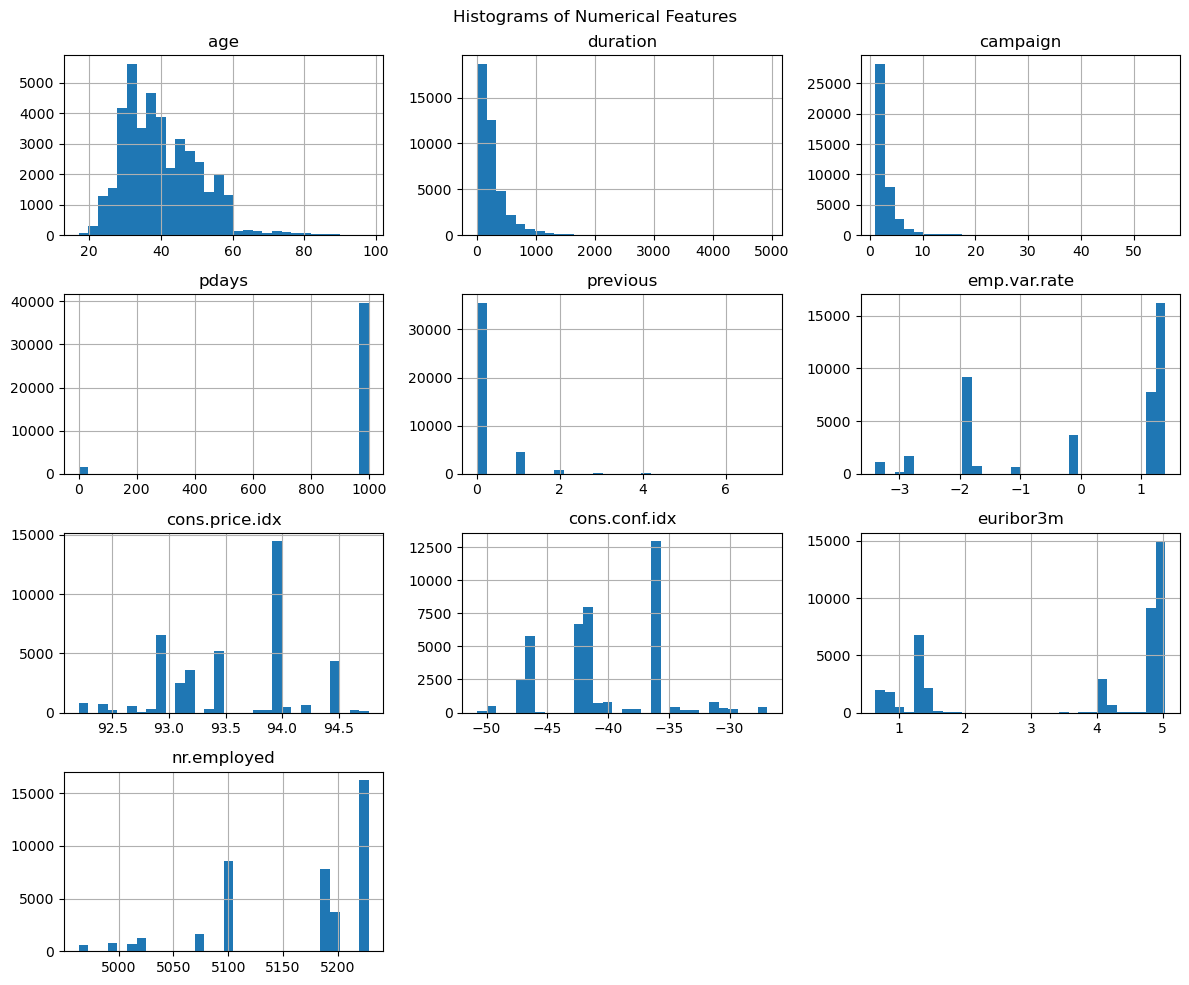

In [105]:
numeric_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col != 'y']
df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

Most histograms are right -skewed, which might indicate the presence of outliers in the data.
The `age` histogram shows a  (positively skewed) distribution, but with a prominent central tendency around the younger adult to middle-aged group(20-40 yrs).
The majority of the customers in this dataset are relatively young to middle-aged adults. This suggests the product/service or campaign might be targeted towards, or naturally attracts, this demographic. The presence of older customers, though fewer, indicates the product/service is not exclusive to young people.
 `Campaign` representing the number of contacts performed during this campaign,shows a right-skewed  distribution, with majority of observations being concentrated at 1  and 2.
The pattern shows that most customers are contacted only once or twice. A smaller number are contacted more frequently, and a very small number are contacted many times (perhaps indicating persistent but unsuccessful attempts to convert, or very high-value leads).
`pdays`  is  a mixed-type variable with strong categorical components (-1 and 999/1000). Treating it purely as a continuous numerical variable will likely lead to poor model performance. It should be re-engineered into separate binary flags or handled with a specialized encoding.


## Data Visualization

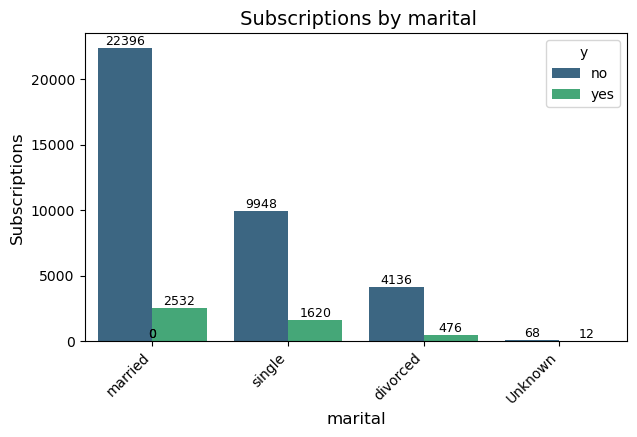

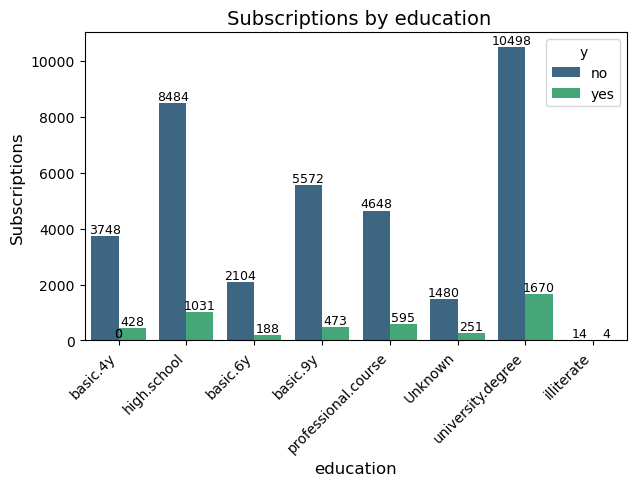

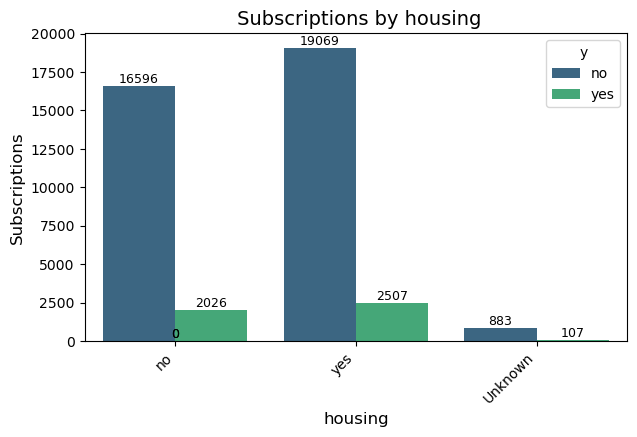

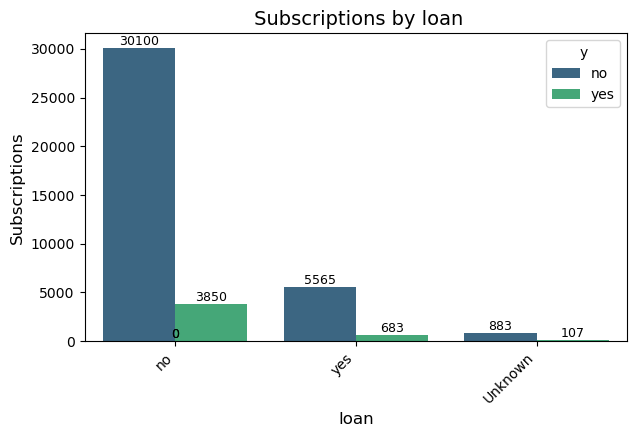

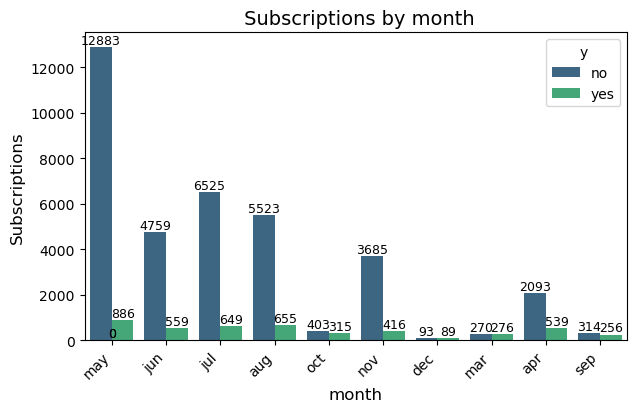

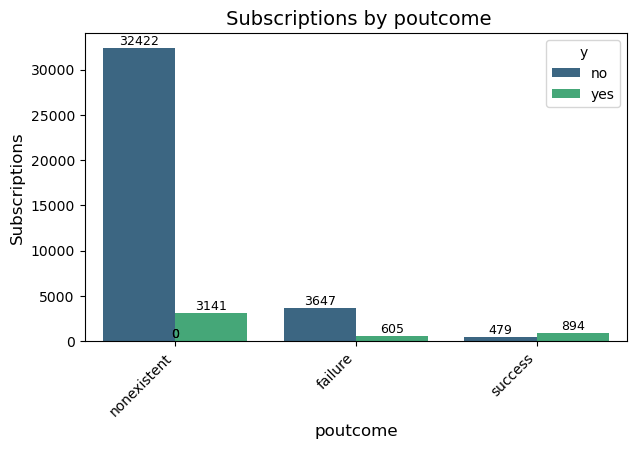

In [106]:

for col in ['marital', 'education', 'housing', 'loan', 'month', 'poutcome']:
    plt.figure(figsize=(7, 4))
    

    ax = sns.countplot(x=col,  data=df, hue='y', palette='viridis')
    
    plt.title(f' Subscriptions by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Subscriptions', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    
    for p in ax.patches:
       
        height = p.get_height()
        
        
        ax.text(p.get_x() + p.get_width() / 2., 
                height + 0.5,                  
                f'{int(height)}',              
                ha='center', va='bottom', fontsize=9, color='black')


    

In `marital`, married people had a higher subscription to the bank's products.
In `education`,university had the highest subscription of 1670, followed by high school with 1031.This indicates that the majority of subscribers are either college or highschool students. 
In `housing`, most subscribers were those with houses.The campaign could target landlords or tenants seeking to take mortages for a house loan.
In `loan`, clients without loans were the most subscribers.

In [235]:

loan_dist = pd.DataFrame({
    'Count': df['loan'].value_counts(),
    'Percentage': df['loan'].value_counts(normalize=True) * 100})
print(loan_dist)
print("\n--- Distribution of 'marital' ---")
# Get counts
marital_counts = df['marital'].value_counts()
print("Counts:\n", marital_counts)

marital_percentages = df['marital'].value_counts(normalize=True) * 100
print("\nPercentages:\n", marital_percentages)
housing_counts = df['housing'].value_counts()
print("Counts:\n", housing_counts)
housing_percentages = df['housing'].value_counts(normalize=True) * 100
print("\nPercentages:\n",housing_percentages)

      Count  Percentage
loan                   
no    34940   84.830533
yes    6248   15.169467

--- Distribution of 'marital' ---
Counts:
 marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64

Percentages:
 marital
married     60.716714
single      28.085850
divorced    11.197436
Name: proportion, dtype: float64
Counts:
 marital
married     25008
single      11568
divorced     4612
Name: count, dtype: int64

Percentages:
 housing
yes    54.787802
no     45.212198
Name: proportion, dtype: float64


## Data Imputation

For some categorical attributes such as `marital`, `loan` and `housing` since their unknown category is the minority among all other categories for these attribute; replace the unknown placeholder with the mode category for that attribute.

In [ ]:
categorical_attributes = ["marital", "loan", "housing"]

for attribute in categorical_attributes:
    mode_category = df[attribute].mode()[0]
    df[attribute] = df[attribute].replace("unknown", mode_category)


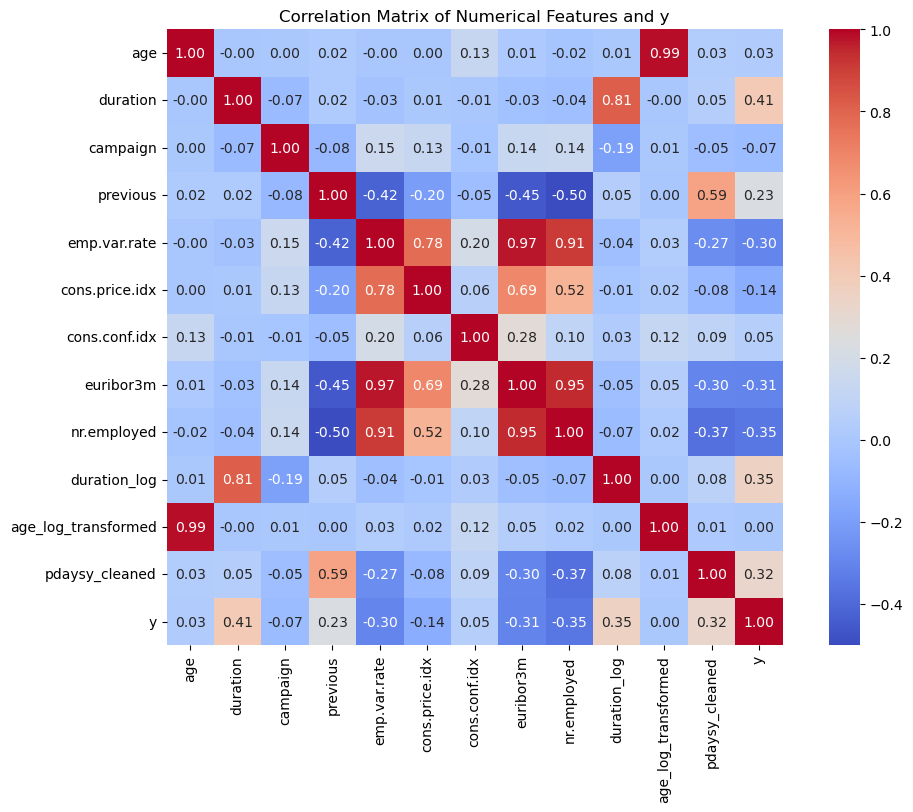

In [184]:

df.
numeric_df = df.select_dtypes(include=np.number) # Selects only columns with numeric dtypes

y_variable = 'y'
feature_columns = [col for col in numeric_df.columns if col != 'y']
feature_columns = [col for col in numeric_df.columns if col != y_variable]
columns_corr = feature_columns + [y_variable]

# Create a new DataFrame containing only the selected columns
df_corr_with_y = numeric_df[columns_corr]

# Calculate the correlation matrix for this subset of columns
corr_matrix = df_corr_with_y.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8)) # Adjust figsize as needed
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title(f'Correlation Matrix of Numerical Features and {y_variable}')
plt.show()


)


Top Predictors of Subscription (y):
`duration_log` (0.38) correlates more strongly with `y` 
`euribor3m`: -0.37 (Moderate negative correlation). As the Euribor 3-month interest rate increases,` y` tends to decrease.
`nr.employed`: -0.35 (Moderate negative correlation). As the number of employees increases,` y` tends to decrease.
`emp.var.rate`: -0.30 (Weak to moderate negative correlation). As employment variation rate increases, `y` tends to decrease.
`cons.price.idx`: -0.30 (Weak to moderate negative correlation). As consumer price index increases, `y` tends to decrease.
`age`, `campaign`, `previous`, `cons.conf.idx`, and `pdaysy_cleaned` seem to have very weak linear relationships with `y`.
 `euribor3m` ,`emp.var.rate`,`nr.employed`, have high correlations with each other suggesting multicollinearity. 

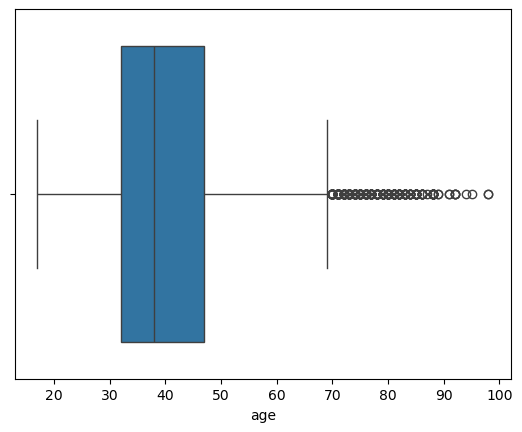

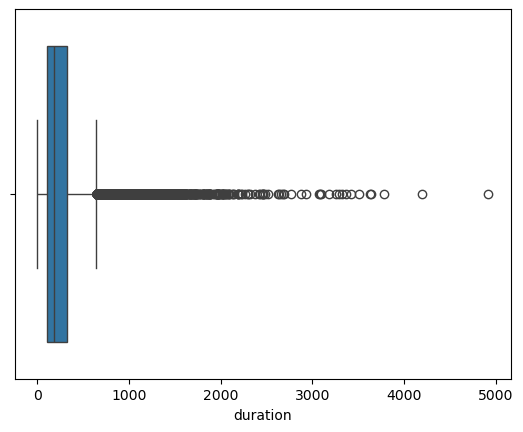

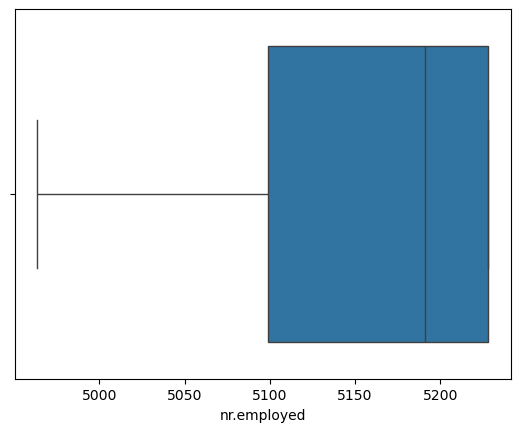

In [114]:
#checking for outliers
sns.boxplot(x=df['age'])
plt.show()
sns.boxplot(x=df['duration'])
plt.show()
sns.boxplot(x=df['nr.employed'])
plt.show()



## Data processing and transformation

encoding categorical variables

In [208]:
#handling outliers

df['duration_log'] = np.log1p(df['duration'])

df_dataset=df.drop(['age_log_transformed'],axis=1)
df_cleaned=df_dataset.rename(columns={
    'pdaysy_cleaned': 'pdays'})
# encoding categorical varibales
##
# Applying HotEncoding
##df_encoded = pd.get_dummies(df, columns=categorical_cols, dtype=int)




In [266]:
df_cleaned.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_log,pdays
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5.568345,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5.010635,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5.424950,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5.023881,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,5.730100,0


In [267]:
rows_to_drop_indices = df_cleaned[df_cleaned['poutcome'] == 'nonexistent'].index
df_on = df_cleaned.drop(rows_to_drop_indices)

In [271]:
#encoding variables
cat_cols = df_on.select_dtypes(include='object').columns.tolist()

# Use a list comprehension to create a new list excluding 'y' and 'poutcome'
cat_cols = [col for col in cat_cols if col not in ['y', ]]

print(f"\nCategorical columns to encode: {cat_cols}")





Categorical columns to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [283]:
df_encoded = pd.get_dummies(df_on, columns=cat_cols, dtype=int)
cat=df_encoded.drop(["cons.price.idx", 'cons.conf.idx', 'duration','emp.var.rate'], axis=1)

### Splitting the data

In [278]:
#splitting the data
X = cat.drop('y', 	 axis=1)
y = cat['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [279]:
#handling class imbalance

print("Training set class balance:\n", y_train.value_counts(normalize=True))



Training set class balance:
 y
0    0.733556
1    0.266444
Name: proportion, dtype: float64


## Modelling the data

#### Logistic regression

In [293]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(class_weight='balanced',max_iter=10000)

In [294]:
print("\n---  Logistic Regression Model ---")
logistic_model.fit(X_train, y_train)
print(" Logistic Model training.")


---  Logistic Regression Model ---
 Logistic Model training.


In [309]:
from sklearn.metrics import classification_report,f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve

<>:11: SyntaxWarning: invalid escape sequence '\F'
<>:11: SyntaxWarning: invalid escape sequence '\F'
C:\Users\USER\AppData\Local\Temp\ipykernel_12644\1522553766.py:11: SyntaxWarning: invalid escape sequence '\F'
  print("\F1 Score:")



--- Model Evaluation (Logistic Regression) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       825
           1       0.60      0.84      0.70       300

    accuracy                           0.81      1125
   macro avg       0.76      0.82      0.78      1125
weighted avg       0.84      0.81      0.81      1125


Confusion Matrix:
[[656 169]
 [ 49 251]]
\F1 Score:
F1 Score: 0.6972222222222222
ROC AUC Score: 0.8999
Precision-Recall AUC: 0.6904
Precision-Recall AUC: 0.6904


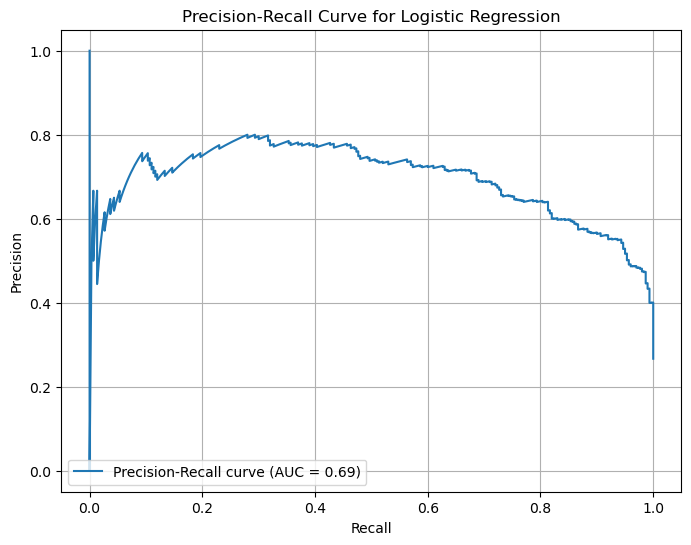


--- Summary of Logistic Regression Model ---
1. Data Preprocessing (Scaling numerical, One-Hot Encoding categorical) was applied.
2. Target variable imbalance was addressed using 'class_weight="balanced"' in Logistic Regression.
3. Evaluation performed using Classification Report, ROC AUC, and Precision-Recall AUC.
4. Precision, Recall, F1-score for the positive class (1), and ROC AUC/PR AUC for overall performance on imbalanced data.


In [310]:
print("\n--- Model Evaluation (Logistic Regression) ---")

y_pred = logistic_model.predict(X_test)
y_prob = logistic_model.predict_proba(X_test)[:, 1] # Probability of the positive class (1 = 'yes')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\F1 Score:")
print("F1 Score:", f1_score(y_test, y_pred))
# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Precision-Recall Curve and AUC (often more informative for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")




# Precision-Recall Curve and AUC (often more informative for imbalanced data)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print("\n--- Summary of Logistic Regression Model ---")
print("1. Data Preprocessing (Scaling numerical, One-Hot Encoding categorical) was applied.")
print("2. Target variable imbalance was addressed using 'class_weight=\"balanced\"' in Logistic Regression.")
print("3. Evaluation performed using Classification Report, ROC AUC, and Precision-Recall AUC.")
print("4. Precision, Recall, F1-score for the positive class (1), and ROC AUC/PR AUC for overall performance on imbalanced data.")

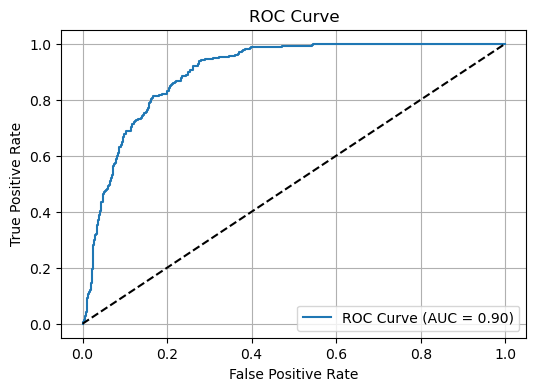

In [301]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Summary

-The Logistic Regression model with class_weight='balanced' performed reasonably well, especially considering the data imbalance:


-Interpretation of Classification Report:
The model is excellent at identifying Class 0 (non-subscribers), with high precision (0.93) and F1-score (0.86).
Despite imbalance, the model achieved a respectable recall of 0.84 for Class 1 (subscribers).
This means it's identifying a high percentage of actual subscribers.
The lower precision for Class 1 (0.60) compared to its recall (0.84) indicates a trade-off.
The model is good at finding most positive cases (high recall), but sometimes it incorrectly flags a negative case as positive (lower precision). This is common when using class_weight='balanced' or oversampling, as it prioritizes finding the minority class.

Interpretation of confusion matix:
True Negatives (TN = 656): The model correctly predicted 656 instances as Class 0 (did not subscribe) when they actually were Class 0.
False Positives (FP = 169): The model incorrectly predicted 169 instances as Class 1 (subscribed) when they were actually Class 0. These are "Type I errors" or "false alarms."
False Negatives (FN = 49): The model incorrectly predicted 49 instances as Class 0 (did not subscribe) when they were actually Class 1. These are "Type II errors" or "misses." For a bank marketing campaign, missing a potential subscriber (FN) can be costly.
True Positives (TP = 251): The model correctly predicted 251 instances as Class 1 (subscribed) when they actually were Class 1. These are the successful identifications of the  target group.


F1 Score: 0.69722
This is the F1-score for Class 1 (the positive/minority class), which was 0.70 in the classification report,indicating a reasonable balance between its precision and recall.


A high PR AUC means the model achieves high precision (low false positives) and high recall (low false negatives) simultaneously for the minority class.
A PR AUC of 0.6904 (approximately 0.69) is decent but not as high as  ROC AUC, due to imbalanced data. 


It's highly accurate at identifying non-subscribers (Class 0).
Crucially, it achieves a good recall for subscribers (Class 1) at 84%, meaning it's catching most of the potential positive leads.
The ROC AUC  , which measures the classifier's ability to distinguish between classes was 0.90. 
This indicates that the model has a strong ability to rank positive instances higher than negative instances. It's a robust metric for imbalanced datasets because it considers all possible classification thresholds.
Precision-Recall AUC
The PR AUC of 0.69 reflects the challenge of achieving both high precision and high recall simultaneously for the minority class with this model.

#### Random Forest modelling

In [312]:
from imblearn.over_sampling import SMOTE 

In [313]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_resampled).value_counts())

Before SMOTE:
 y
0    3301
1    1199
Name: count, dtype: int64
After SMOTE:
 y
0    3301
1    3301
Name: count, dtype: int64


In [314]:
random_f_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
random_f_model.fit(X_train_resampled, y_train_resampled)
y_pred = random_f_model.predict(X_test)
y_prob = random_f_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[724 101]
 [ 94 206]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88       825
           1       0.67      0.69      0.68       300

    accuracy                           0.83      1125
   macro avg       0.78      0.78      0.78      1125
weighted avg       0.83      0.83      0.83      1125

ROC-AUC Score: 0.9002505050505051


 ###     Random Forest Summary


This Logistic Regression model effectively classifies bank marketing outcomes, demonstrating strong overall discriminatory power with an ROC AUC score of 0.90. For the majority class (clients not subscribing), the model performs exceptionally well, achieving 89% precision and 88% recall. However, for the minority class (clients who do subscribe), there's a clear trade-off: the model exhibits decent precision at 67% (meaning 2 out of 3 positive predictions are correct) but a slightly lower recall at 69% (meaning it correctly identifies about two-thirds of actual subscribers while missing one-third).

Compared to the previous model, this iteration shows an improvement in precision for the minority class, reducing false positives (unnecessary marketing efforts). However, this comes at the cost of decreased recall, leading to more false negatives (missed potential subscribers). The choice between these models hinges on the bank's specific priorities: if minimizing wasted marketing is paramount, the current model's higher precision is advantageous; if maximizing the capture of every potential subscriber is key, the previous model's higher recall might be preferred.

## Data Sources
[Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing) of dataset. 

**Citations**:  
- S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
- S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS. 